In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

np.random.seed(52)

In [2]:
df = pd.read_csv("cirrhosis.csv")

In [3]:
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [4]:
df = df.dropna(subset='Drug')
df = df.drop('ID', axis=1)
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,1153,C,D-penicillamine,22347,F,N,Y,N,N,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,994,C,Placebo,21294,F,N,N,N,N,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,939,C,D-penicillamine,22767,F,N,N,N,N,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,839,C,D-penicillamine,13879,F,N,N,N,N,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


In [5]:
#  поменять потом на более красивое решение с DRY
# меняем dtype всех фич из object в int64, кроме Status, который является таргетом
df['Status'] = df['Status'].apply(lambda x: 0 if x == 'D' else (1 if x == 'C' else 2))
df['Sex'] = df['Sex'].apply(lambda x:1 if x=='M' else 0)
df['Ascites'] = df['Ascites'].apply(lambda x:1 if x=='Y' else 0)
df['Hepatomegaly'] = df['Hepatomegaly'].apply(lambda x:1 if x=='Y' else 0)
df['Spiders'] = df['Spiders'].apply(lambda x:1 if x=='Y' else 0)
df['Edema'] = df['Edema'].apply(lambda x:2 if x=='Y' else (1 if x == 'S' else 0))
df['Drug'] = df['Drug'].apply(lambda x:1 if x=='D-penicillamine' else 0)
df.head(5)

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,0,1,21464,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,1,1,20617,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,0,1,25594,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,0,1,19994,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,2,0,13918,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [6]:
df.groupby('Status').mean().T

Status,0,1,2
N_Days,1475.640000,2457.583333,1508.210526
Drug,0.520000,0.494048,0.526316
Age,19446.544000,17758.922619,15039.421053
Sex,0.176000,0.065476,0.157895
Ascites,0.184000,0.005952,0.000000
Hepatomegaly,0.704000,0.357143,0.631579
Spiders,0.416000,0.196429,0.263158
Edema,0.440000,0.071429,0.105263
Bilirubin,5.630400,1.503571,3.131579
Cholesterol,415.754386,326.539474,439.500000


In [7]:
#  поменять потом на более красивое решение с DRY
df['Cholesterol'] = df['Cholesterol'].fillna(
    df['Status'].apply(lambda x: 415.754386 if x == 'D' else (326.539474 if x == 'C' else 439.500000))
)
df['Copper'] = df['Copper'].fillna(
    df['Status'].apply(lambda x: 135.411290 if x == 'D' else (66.610778 if x == 'C' else 124.000000))
)
df['Tryglicerides'] = df['Tryglicerides'].fillna(
    df['Status'].apply(lambda x: 140.486726 if x == 'D' else (111.788079 if x == 'C' else 133.944444))
)
df['Platelets'] = df['Platelets'].fillna(
    df['Status'].apply(lambda x: 242.137097 if x == 'D' else (272.563636 if x == 'C' else 298.842105))
)

In [8]:
df.Cholesterol = df.Cholesterol.round(0).astype('int64')
df.Copper = df.Copper.round(0).astype('int64')
df.Alk_Phos = df.Alk_Phos.round(0).astype('int64')
df.SGOT = df.SGOT.round(0).astype('int64')
df.Tryglicerides = df.Tryglicerides.round(0).astype('int64')
df.Platelets = df.Platelets.round(0).astype('int64')
df.Stage = df.Stage.round(0).astype('int64')
df.Age = (df.Age/365.25).astype('int64')

In [9]:
pd.DataFrame(df.isnull().sum(), 
            columns = ['missing_count']) \
.assign(missing_pct = lambda x: x['missing_count']/df.shape[0]*100).astype(float).round(1)

,missing_count,missing_pct
N_Days,0.0,0.0
Status,0.0,0.0
Drug,0.0,0.0
Age,0.0,0.0
Sex,0.0,0.0
Ascites,0.0,0.0
Hepatomegaly,0.0,0.0
Spiders,0.0,0.0
Edema,0.0,0.0
Bilirubin,0.0,0.0


In [10]:
df.groupby('Status').mean().T

Status,0,1,2
N_Days,1475.64000,2457.583333,1508.210526
Drug,0.52000,0.494048,0.526316
Age,52.69600,48.107143,40.684211
Sex,0.17600,0.065476,0.157895
Ascites,0.18400,0.005952,0.000000
Hepatomegaly,0.70400,0.357143,0.631579
Spiders,0.41600,0.196429,0.263158
Edema,0.44000,0.071429,0.105263
Bilirubin,5.63040,1.503571,3.131579
Cholesterol,417.88800,337.345238,439.526316


In [11]:
def quality_report(actual, prediction):
    print("Accuracy: {:.3f}\nPrecision: {:.3f}\nRecall: {:.3f}\nf1_score: {:.3f}".format(
        accuracy_score(actual, prediction),
        precision_score(actual, prediction, average='weighted'),
        recall_score(actual, prediction, average='weighted'),
        f1_score(actual, prediction, average='weighted')
    ))

In [12]:
X = df.drop(['Status'], axis=1)
Y = df['Status']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=52, stratify=Y
)

In [14]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
logreg = LogisticRegression(penalty=None)
logreg.fit(X_train_scaled, y_train)
preds = logreg.predict(X_test_scaled)
probs = logreg.predict_proba(X_test_scaled)

In [16]:
from sklearn.preprocessing import label_binarize

In [17]:
print(classification_report(y_test, preds))
lr_auc = roc_auc_score(y_test, probs, average='weighted', multi_class='ovr')
print("ROC-AUC:", lr_auc)
quality_report(y_test, preds)

              precision    recall  f1-score   support

           0       0.84      0.71      0.77        38
           1       0.75      0.90      0.82        50
           2       0.50      0.17      0.25         6

    accuracy                           0.78        94
   macro avg       0.70      0.59      0.61        94
weighted avg       0.77      0.78      0.76        94

ROC-AUC: 0.8247271345675603
Accuracy: 0.777
Precision: 0.772
Recall: 0.777
f1_score: 0.763


In [18]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import export_graphviz
import os
import graphviz
import pydotplus

os.environ["PATH"] += os.pathsep + '/usr/local/bin/'

def plot_tree(model, cols, fname='temp_tree.png'):
    dot_data = export_graphviz(model, filled=True, rounded=True, feature_names=cols, out_file=None)
    pydot_graph = pydotplus.graph_from_dot_data(dot_data)
    pydot_graph.write_png(fname)
    img = plt.imread(fname)
    plt.imshow(img)
    # plt.axis('off')
    # plt.show()

In [19]:
clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2, criterion='gini')
clf.fit(X_train_scaled, y_train)
pred = clf.predict(X_test_scaled)
prob = clf.predict_proba(X_test_scaled)
print(classification_report(y_test, pred))
dt_auc = roc_auc_score(y_test, prob, average='weighted', multi_class='ovr')
print("ROC-AUC:", dt_auc)
quality_report(y_test, pred)

              precision    recall  f1-score   support

           0       0.68      0.55      0.61        38
           1       0.76      0.90      0.83        50
           2       0.00      0.00      0.00         6

    accuracy                           0.70        94
   macro avg       0.48      0.48      0.48        94
weighted avg       0.68      0.70      0.69        94

ROC-AUC: 0.6952369439071566
Accuracy: 0.702
Precision: 0.680
Recall: 0.702
f1_score: 0.685


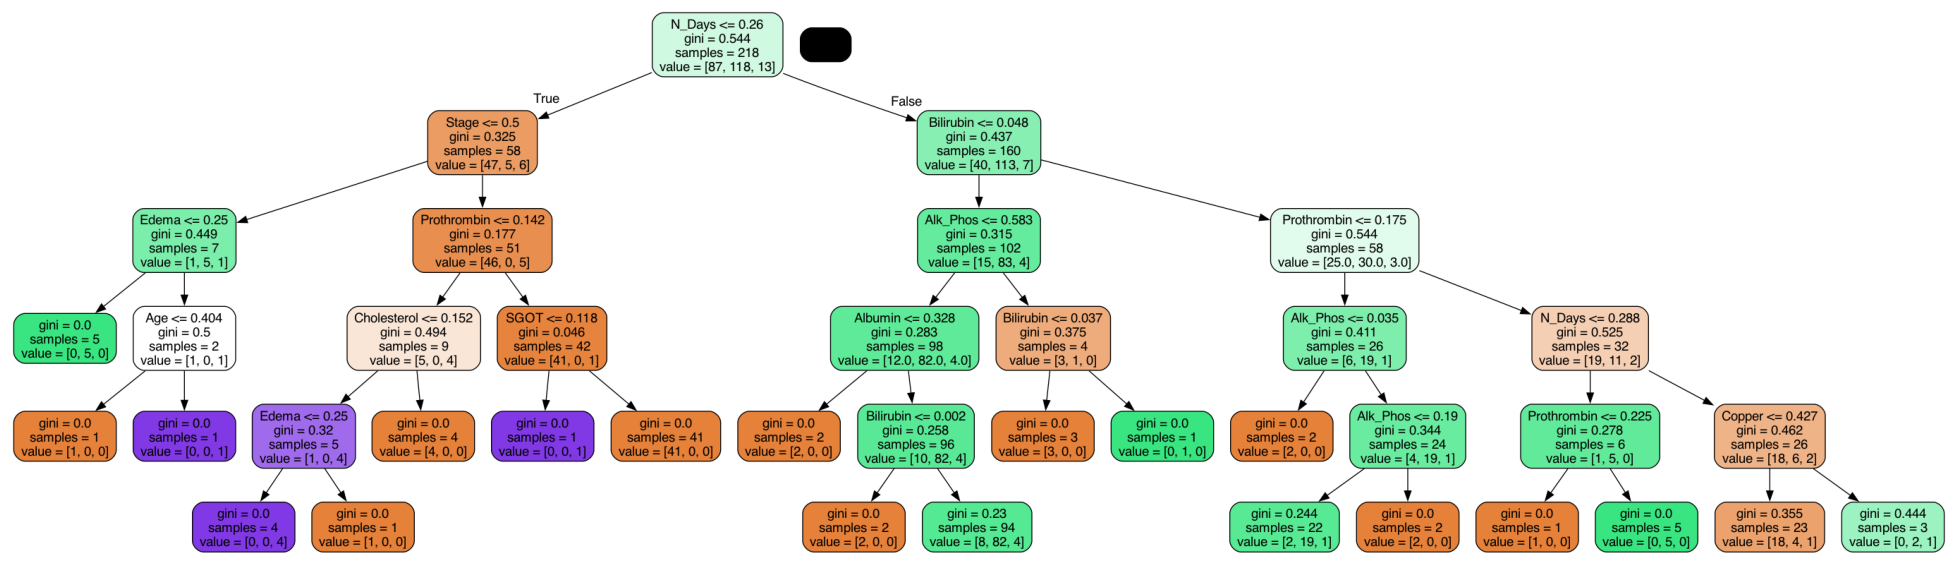

In [20]:
plt.figure(figsize=(25, 25))
plt.axis('off')
plot_tree(clf, df.columns[df.columns != 'Status'])

In [21]:
pd.DataFrame(clf.feature_importances_, index = list(df.columns[df.columns != 'Status']),\
             columns = ['feature importance']).sort_values('feature importance', ascending = False)

,feature importance
N_Days,0.402085
Bilirubin,0.132335
Prothrombin,0.101483
Alk_Phos,0.099478
Stage,0.081558
Edema,0.045564
Albumin,0.036583
Cholesterol,0.034627
Copper,0.030346
SGOT,0.023767


In [56]:
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train_scaled, y_train)
knn_preds = knn.predict(X_test_scaled)
knn_probs = knn.predict_proba(X_test_scaled)

In [57]:
print(classification_report(y_test, knn_preds))
knn_auc = roc_auc_score(y_test, knn_probs, average='weighted', multi_class='ovr')
print("ROC-AUC:", knn_auc)
quality_report(y_test, knn_preds)

              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.70      1.00      0.83        50
           2       0.00      0.00      0.00         6

    accuracy                           0.77        94
   macro avg       0.55      0.53      0.52        94
weighted avg       0.76      0.77      0.73        94

ROC-AUC: 0.8565038684719536
Accuracy: 0.766
Precision: 0.761
Recall: 0.766
f1_score: 0.731


In [58]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])

In [59]:
classes = le.classes_

In [60]:
from sklearn.metrics import auc

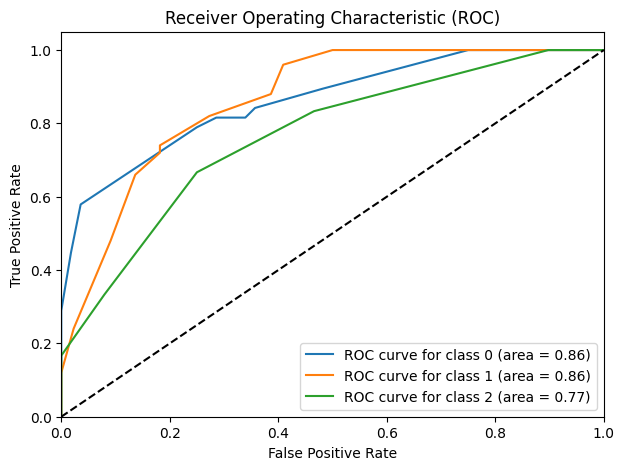

In [61]:
# Построение ROC-кривой для каждого класса
plt.figure(figsize=(7, 5))

for i, class_name in enumerate(classes):
    # Вычисление ROC-кривой
    fpr, tpr, _ = roc_curve(y_test == i, knn_probs[:, i])
    roc_auc_value = auc(fpr, tpr)
    
    # Построение ROC-кривой
    plt.plot(fpr, tpr, label=f'ROC curve for class {class_name} (area = {roc_auc_value:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Линия случайного угадывания
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

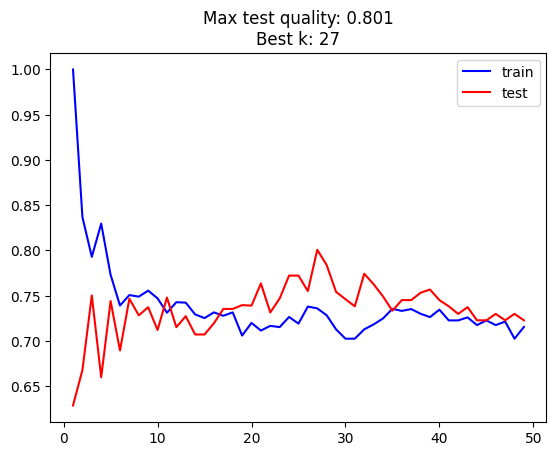

In [62]:
neighbors = range(1, 50)
f1_score_train = []
f1_score_test = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    f1_score_train.append(f1_score(knn.predict(X_train_scaled), y_train, average='weighted'))
    f1_score_test.append(f1_score(knn.predict(X_test_scaled), y_test, average='weighted'))
    
plt.plot(neighbors, f1_score_train, color='blue', label='train')
plt.plot(neighbors, f1_score_test, color='red', label='test')
plt.title("Max test quality: {:.3f}\nBest k: {}".format(max(f1_score_test), np.argmax(f1_score_test)+1))
plt.legend();

In [29]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier

In [30]:
model = RandomForestClassifier(n_estimators=500, n_jobs=-1, max_depth = None, oob_score=True)
model.fit(X_train_scaled, y_train)
print(f'Test score estimate using Out-of-bag score {model.oob_score_:.4f}')
print(f'Actual test score: {accuracy_score(model.predict(X_test_scaled), y_test):.4f}')
print(f'Train score: {accuracy_score(model.predict(X_train_scaled), y_train):.4f}')
print(classification_report(y_test, model.predict(X_test_scaled)))
rfc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled), average='weighted', multi_class='ovr')
print("ROC-AUC:", rfc_auc)
quality_report(y_test, model.predict(X_test_scaled))

Test score estimate using Out-of-bag score 0.7523
Actual test score: 0.7766
Train score: 1.0000
              precision    recall  f1-score   support

           0       0.83      0.66      0.74        38
           1       0.75      0.96      0.84        50
           2       0.00      0.00      0.00         6

    accuracy                           0.78        94
   macro avg       0.53      0.54      0.53        94
weighted avg       0.74      0.78      0.75        94

ROC-AUC: 0.9014662199502623
Accuracy: 0.777
Precision: 0.736
Recall: 0.777
f1_score: 0.745


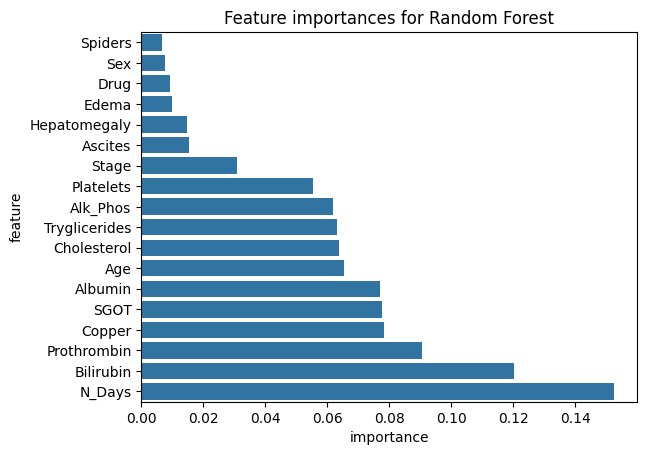

In [31]:
feature_importances = zip(X.columns, model.feature_importances_)
feature_importances = sorted(feature_importances, key=lambda x: x[1])
feature_importances = pd.DataFrame(feature_importances, columns=['feature', 'importance'])

plt.title('Feature importances for Random Forest')
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.show()

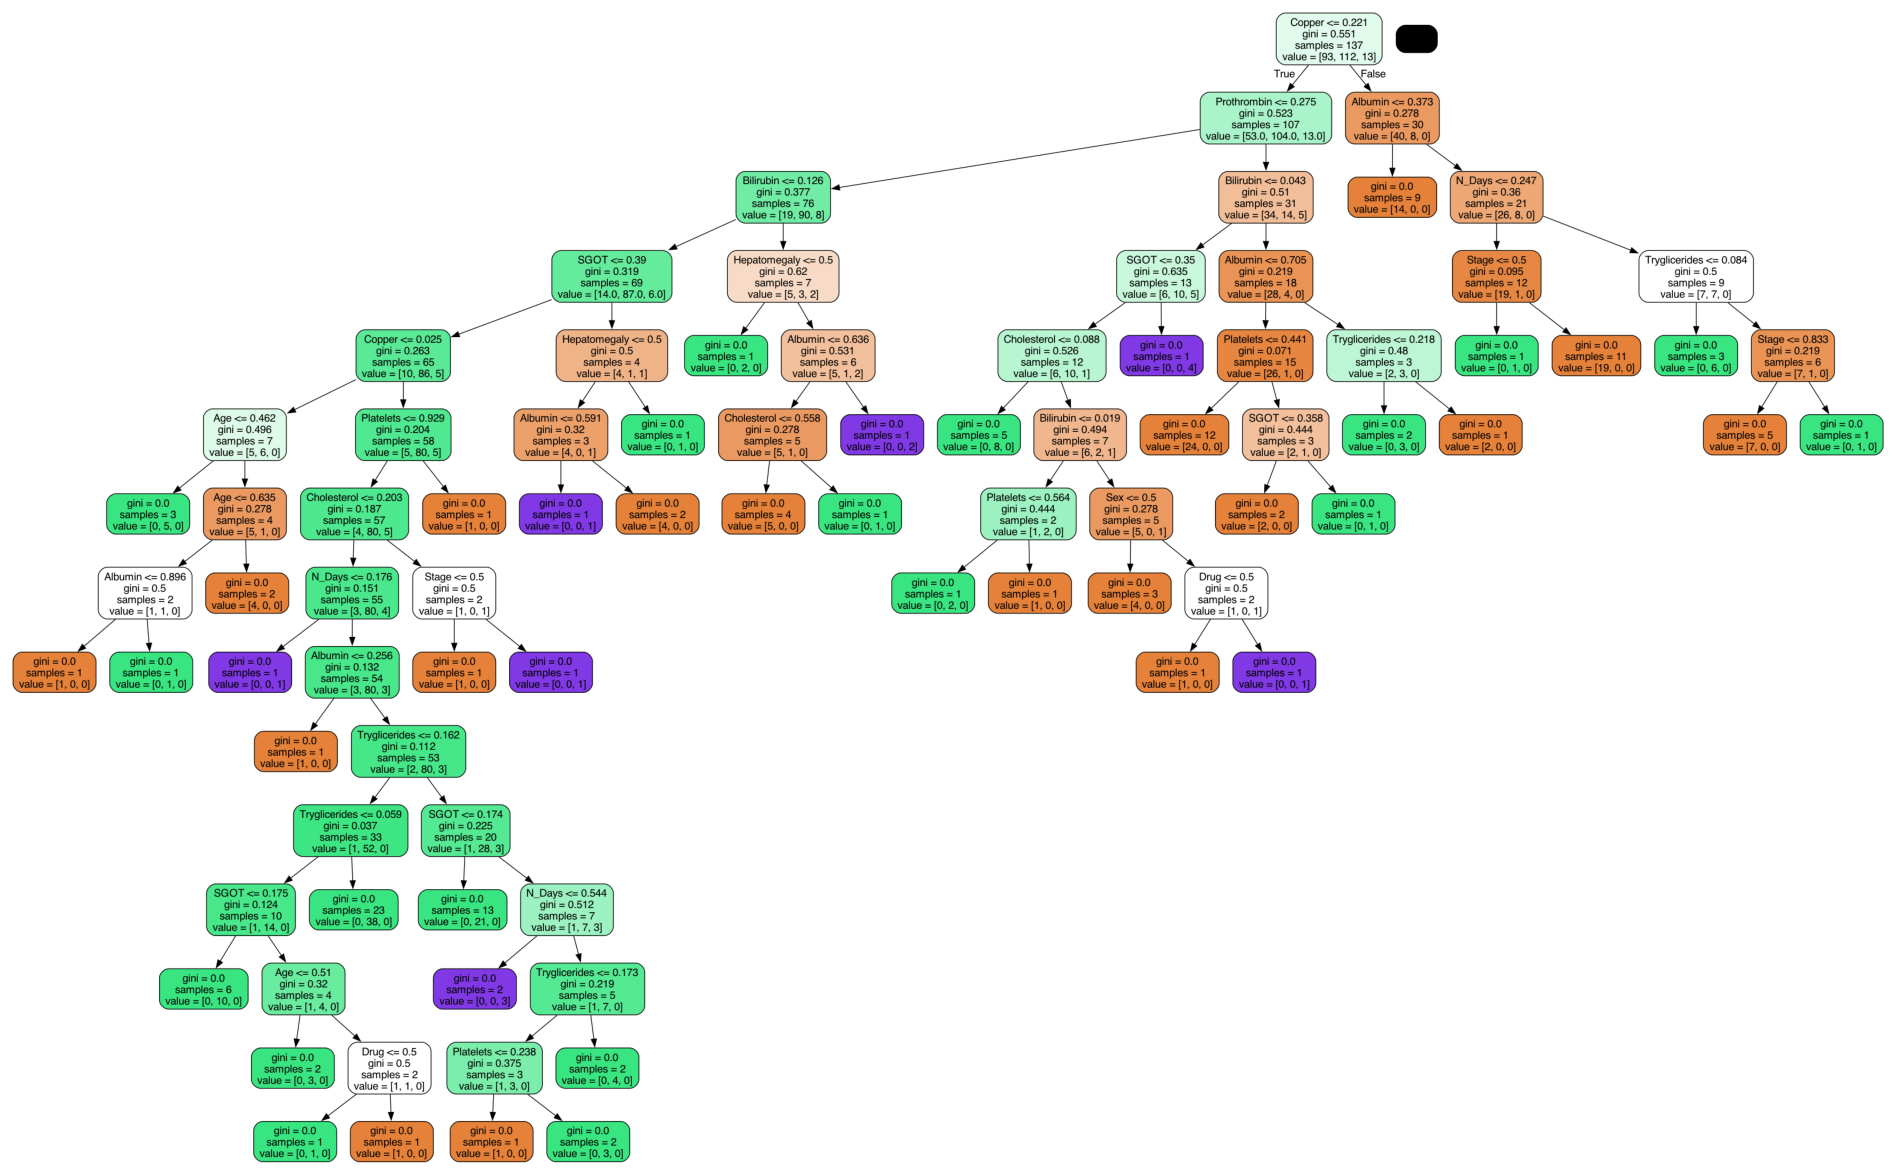

In [32]:
tree2 = model.estimators_[1]

plt.figure(figsize=(25, 15))
plot_tree(tree2, X.columns)
plt.axis('off')
plt.show()

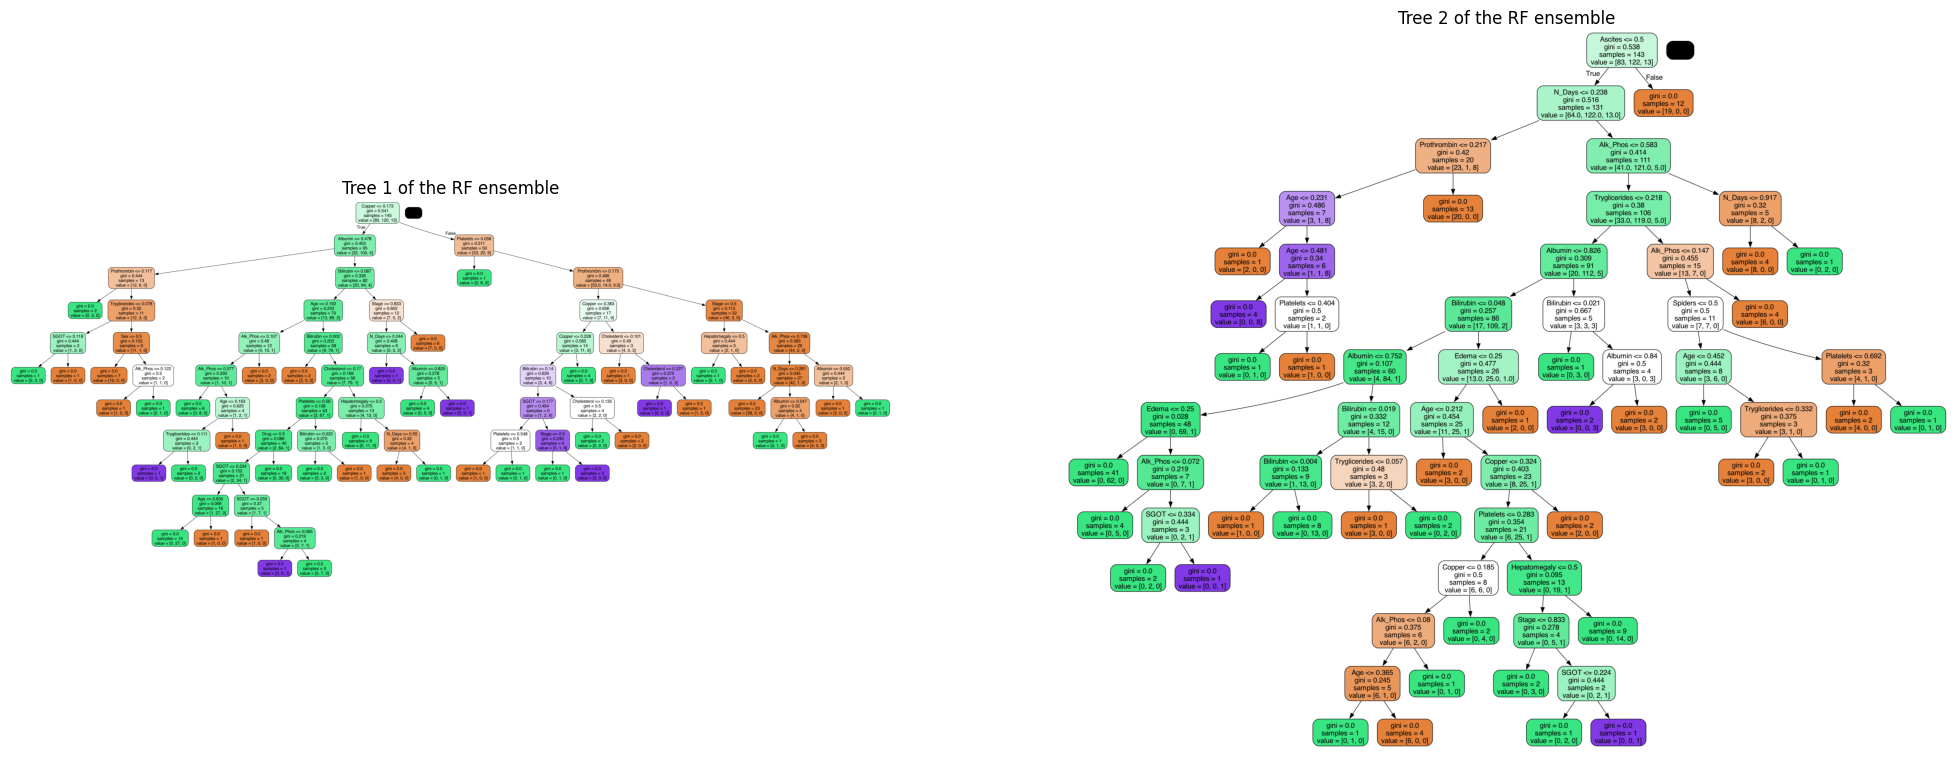

In [33]:
tree1, tree2 = model.estimators_[2], model.estimators_[3]

plt.figure(figsize=(25, 15))
plt.subplot(1, 2, 1)
plot_tree(tree1, X.columns)
plt.axis('off')
plt.title(f'Tree 1 of the RF ensemble')
plt.subplot(1, 2, 2)
plot_tree(tree2, X.columns)
plt.axis('off')
plt.title(f'Tree 2 of the RF ensemble')
plt.show()

In [34]:
parameters = {'n_estimators': [5,10,50, 100, 500], 'max_features' : [None, 3, 5, 10], 'max_depth':[None, 3, 5, 10, 15]}

model = RandomForestClassifier()
clf = GridSearchCV(model, parameters, scoring = 'accuracy')

clf.fit(X_train_scaled, y_train)
clf_pred = clf.predict(X_test_scaled)
print(f'Actual test score: {accuracy_score(y_test, clf_pred):.4f}')
print('Best parameters: ', clf.best_params_)
print(classification_report(y_test, clf_pred))
clf_auc = roc_auc_score(y_test, clf.predict_proba(X_test_scaled), average='weighted', multi_class='ovr')
print("ROC-AUC:", clf_auc)
quality_report(y_test, clf_pred)

Actual test score: 0.7979
Best parameters:  {'max_depth': 3, 'max_features': 3, 'n_estimators': 10}
              precision    recall  f1-score   support

           0       0.84      0.68      0.75        38
           1       0.78      0.98      0.87        50
           2       0.00      0.00      0.00         6

    accuracy                           0.80        94
   macro avg       0.54      0.55      0.54        94
weighted avg       0.75      0.80      0.77        94

ROC-AUC: 0.89130284609008
Accuracy: 0.798
Precision: 0.753
Recall: 0.798
f1_score: 0.766


In [35]:
model = BaggingClassifier(DecisionTreeClassifier(max_depth=8), n_jobs=-1, n_estimators=100)
model.fit(X_train_scaled, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=8),
                  n_estimators=100, n_jobs=-1)

In [36]:
print(f'Bagged trees accuracy score {accuracy_score(model.predict(X_test_scaled), y_test):.4f}')

Bagged trees accuracy score 0.7340


In [37]:
print(classification_report(y_test, model.predict(X_test_scaled)))
bc_dtc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled), average='weighted', multi_class='ovr')
print("ROC-AUC:", bc_dtc_auc)
quality_report(y_test, model.predict(X_test_scaled))

              precision    recall  f1-score   support

           0       0.81      0.58      0.68        38
           1       0.72      0.94      0.82        50
           2       0.00      0.00      0.00         6

    accuracy                           0.73        94
   macro avg       0.51      0.51      0.50        94
weighted avg       0.71      0.73      0.71        94

ROC-AUC: 0.8898694390715667
Accuracy: 0.734
Precision: 0.714
Recall: 0.734
f1_score: 0.708


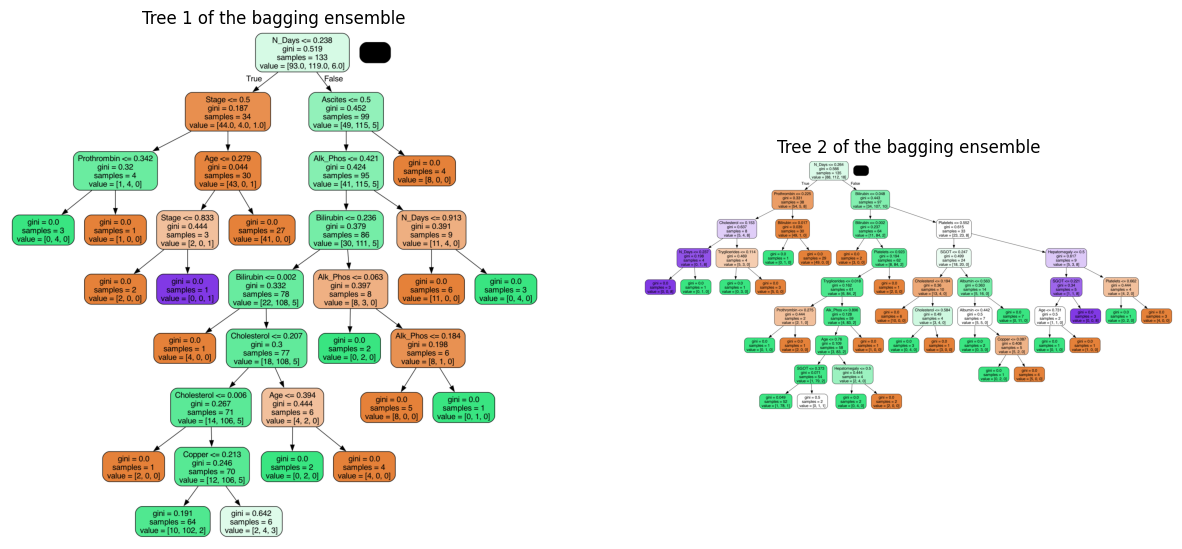

In [38]:
tree1, tree2 = model.estimators_[0], model.estimators_[1]

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plot_tree(tree1, X_train.columns)
plt.axis('off')
plt.title(f'Tree 1 of the bagging ensemble')
plt.subplot(1, 2, 2)
plot_tree(tree2, X_train.columns)
plt.axis('off')
plt.title(f'Tree 2 of the bagging ensemble')
plt.show()

In [39]:
model = BaggingClassifier(DecisionTreeClassifier(max_depth=None), n_jobs=-1, n_estimators=20, oob_score=True)
model.fit(X_train_scaled, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=20,
                  n_jobs=-1, oob_score=True)

In [40]:
print(f'Test score estimate using Out-of-bag score {model.oob_score_:.4f}')
print(f'Test score estimate using Cross-Validation {cross_val_score(model, X_train_scaled, y_train, scoring="accuracy").mean():.4f}')
print(f'Actual test score: {accuracy_score(model.predict(X_test_scaled), y_test):.4f}')
print(f'Train score: {accuracy_score(model.predict(X_train_scaled), y_train):.4f}')
bc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled), average='weighted', multi_class='ovr')
print("ROC-AUC:", bc_auc)
quality_report(y_test, model.predict(X_test_scaled))

Test score estimate using Out-of-bag score 0.7156
Test score estimate using Cross-Validation 0.7103
Actual test score: 0.7447
Train score: 1.0000
ROC-AUC: 0.8739206272450952
Accuracy: 0.745
Precision: 0.702
Recall: 0.745
f1_score: 0.722


In [41]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

In [42]:
est = GradientBoostingClassifier(n_estimators=200, max_depth=3)
est.fit(X_train_scaled, y_train)

est.predict(X_train_scaled)
est.predict_proba(X_train_scaled)

gbc_pred = est.predict(X_test_scaled)
gbc_prob = est.predict_proba(X_test_scaled)
print(classification_report(y_test, est.predict(X_test_scaled)))
gbc_auc = roc_auc_score(y_test, gbc_prob, average='weighted', multi_class='ovr')
print("ROC-AUC:", knn_auc)
quality_report(y_test, est.predict(X_test_scaled))

              precision    recall  f1-score   support

           0       0.80      0.63      0.71        38
           1       0.73      0.92      0.81        50
           2       0.00      0.00      0.00         6

    accuracy                           0.74        94
   macro avg       0.51      0.52      0.51        94
weighted avg       0.71      0.74      0.72        94

ROC-AUC: 0.7774506079027357
Accuracy: 0.745
Precision: 0.712
Recall: 0.745
f1_score: 0.718


In [43]:
from lightgbm import LGBMClassifier
import lightgbm as lgb

In [44]:
lgbm_clf = LGBMClassifier(n_estimators=300, verbosity=-1)
lgbm_clf.fit(X_train_scaled, y_train)
lgbm_pred = lgbm_clf.predict(X_test_scaled)
lgbm_prob = lgbm_clf.predict_proba(X_test_scaled)

In [45]:
print(classification_report(y_test, lgbm_pred))
lgbm_auc = roc_auc_score(y_test, lgbm_prob, average='weighted', multi_class='ovr')
print("ROC-AUC:", knn_auc)
quality_report(y_test, lgbm_pred)

              precision    recall  f1-score   support

           0       0.83      0.66      0.74        38
           1       0.73      0.92      0.81        50
           2       0.00      0.00      0.00         6

    accuracy                           0.76        94
   macro avg       0.52      0.53      0.52        94
weighted avg       0.73      0.76      0.73        94

ROC-AUC: 0.7774506079027357
Accuracy: 0.755
Precision: 0.725
Recall: 0.755
f1_score: 0.730


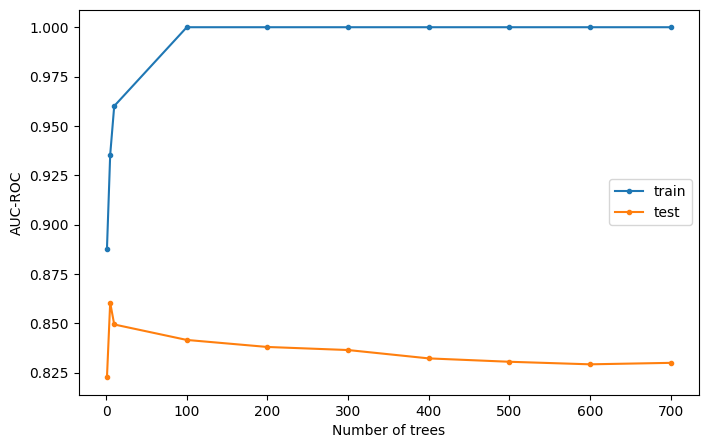

In [46]:
n_trees = [1, 5, 10, 100, 200, 300, 400, 500, 600, 700]
quals_train = []
quals_test = []
for n in n_trees:
    clf = LGBMClassifier(n_estimators=n, verbosity=-1)
    clf.fit(X_train_scaled, y_train)
    q_train = roc_auc_score(y_train, clf.predict_proba(X_train_scaled), average='weighted', multi_class='ovr')
    q_test = roc_auc_score(y_test, clf.predict_proba(X_test_scaled), average='weighted', multi_class='ovr')
    quals_train.append(q_train)
    quals_test.append(q_test)

plt.figure(figsize=(8, 5))
plt.plot(n_trees, quals_train, marker='.', label='train')
plt.plot(n_trees, quals_test, marker='.', label='test')
plt.xlabel('Number of trees')
plt.ylabel('AUC-ROC')
plt.legend()

plt.show()

In [47]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(iterations=300, logging_level='Silent')
clf.fit(X_train_scaled, y_train)
cb_pred = clf.predict(X_test_scaled)
cb = clf.predict_proba(X_test_scaled)

In [48]:
print(classification_report(y_test, cb_pred))
print('ROC-AUC:', roc_auc_score(y_test, clf.predict_proba(X_test_scaled), average='weighted', multi_class='ovr'))
quality_report(y_test, cb_pred)

              precision    recall  f1-score   support

           0       0.85      0.58      0.69        38
           1       0.72      0.98      0.83        50
           2       0.00      0.00      0.00         6

    accuracy                           0.76        94
   macro avg       0.52      0.52      0.51        94
weighted avg       0.73      0.76      0.72        94

ROC-AUC: 0.8946532191213041
Accuracy: 0.755
Precision: 0.725
Recall: 0.755
f1_score: 0.720


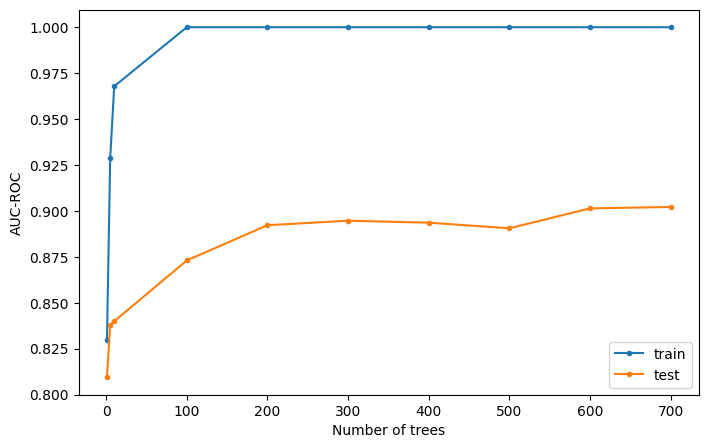

In [49]:
from catboost import CatBoostClassifier
n_trees = [1, 5, 10, 100, 200, 300, 400, 500, 600, 700]
quals_train = []
quals_test = []
for n in n_trees:
    clf = CatBoostClassifier(iterations=n, logging_level='Silent')
    clf.fit(X_train_scaled, y_train)
    q_train = roc_auc_score(y_train, clf.predict_proba(X_train_scaled), average='weighted', multi_class='ovr')
    q_test = roc_auc_score(y_test, clf.predict_proba(X_test_scaled), average='weighted', multi_class='ovr')
    quals_train.append(q_train)
    quals_test.append(q_test)

plt.figure(figsize=(8, 5))
plt.plot(n_trees, quals_train, marker='.', label='train')
plt.plot(n_trees, quals_test, marker='.', label='test')
plt.xlabel('Number of trees')
plt.ylabel('AUC-ROC')
plt.legend()

plt.show()

In [50]:
cb_roc = roc_auc_score(y_test, clf.predict_proba(X_test_scaled), average='weighted', multi_class='ovr')
print('ROC-AUC:', cb_roc)
print(classification_report(y_test, clf.predict(X_test_scaled)))

ROC-AUC: 0.9021483835313623
              precision    recall  f1-score   support

           0       0.88      0.61      0.72        38
           1       0.72      0.98      0.83        50
           2       0.00      0.00      0.00         6

    accuracy                           0.77        94
   macro avg       0.54      0.53      0.52        94
weighted avg       0.74      0.77      0.73        94



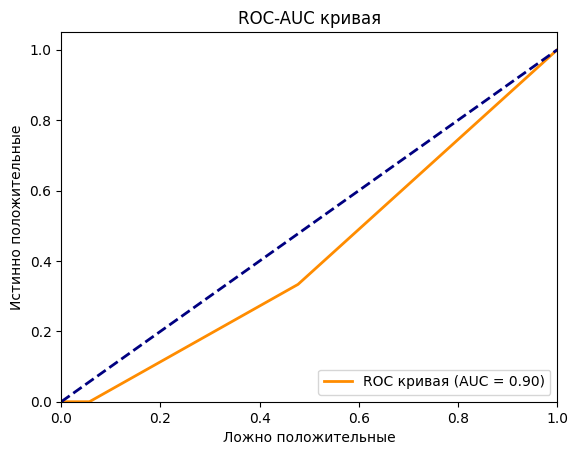

In [51]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC кривая (AUC = %0.2f)' % cb_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложно положительные')
plt.ylabel('Истинно положительные')
plt.title('ROC-AUC кривая')
plt.legend(loc="lower right")
plt.show()

In [52]:
from xgboost import XGBClassifier

In [53]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train_scaled, y_train)
xgb_pred = xgb_clf.predict(X_test_scaled)

In [54]:
print(classification_report(y_test, xgb_pred))
xgb_auc = roc_auc_score(y_test, xgb_clf.predict_proba(X_test_scaled), average='weighted', multi_class='ovr')
print('ROC-AUC:', xgb_auc)
quality_report(y_test, xgb_pred)

              precision    recall  f1-score   support

           0       0.79      0.61      0.69        38
           1       0.72      0.94      0.82        50
           2       0.00      0.00      0.00         6

    accuracy                           0.74        94
   macro avg       0.51      0.52      0.50        94
weighted avg       0.71      0.74      0.71        94

ROC-AUC: 0.8684719535783364
Accuracy: 0.745
Precision: 0.705
Recall: 0.745
f1_score: 0.712


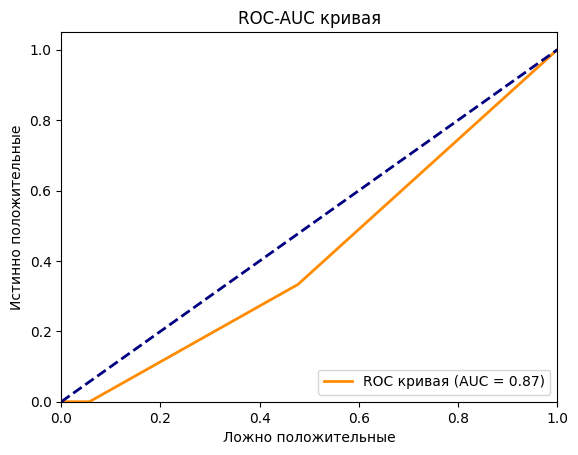

In [55]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC кривая (AUC = %0.2f)' % xgb_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ложно положительные')
plt.ylabel('Истинно положительные')
plt.title('ROC-AUC кривая')
plt.legend(loc="lower right")
plt.show()